# Simple Logistic Regression Modeling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv('churn.csv')

## Why you need logistic regression

### Exploring the explanatory variables

/home/israel/miniconda3/envs/ds1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


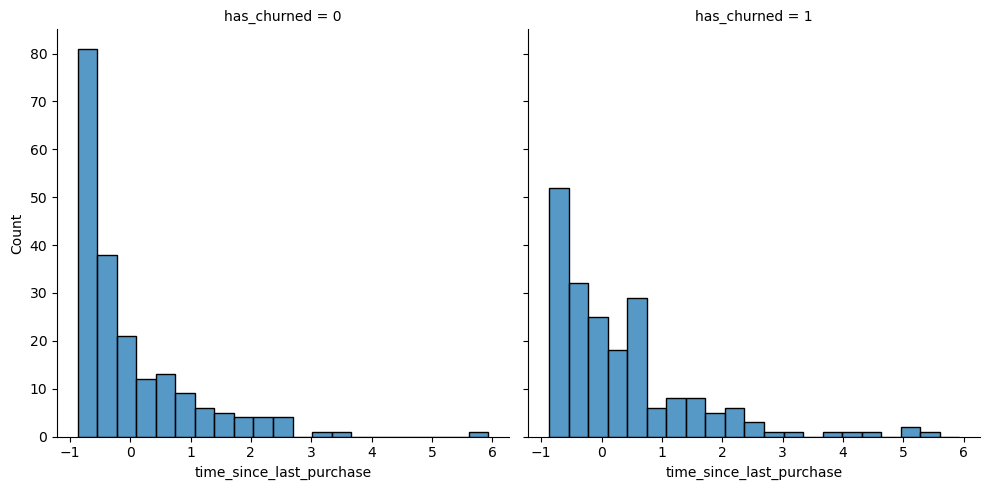

In [7]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(
    data=churn,
    x='time_since_last_purchase',
    col='has_churned'
)

plt.show()

/home/israel/miniconda3/envs/ds1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


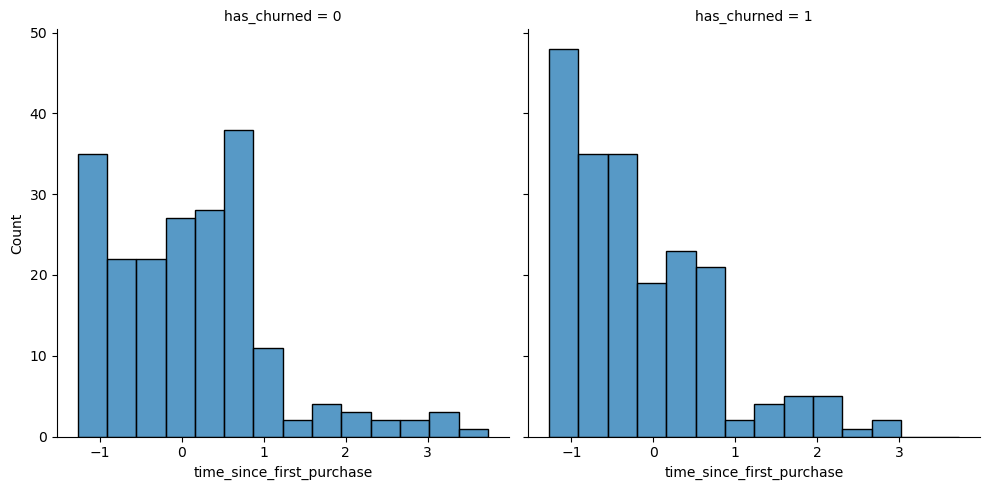

In [8]:
# Redraw the plot with time_since_first_purchase
sns.displot(
    data=churn,
    x='time_since_first_purchase',
    col='has_churned'
)

plt.show()

### Visualizing linear and logistic models

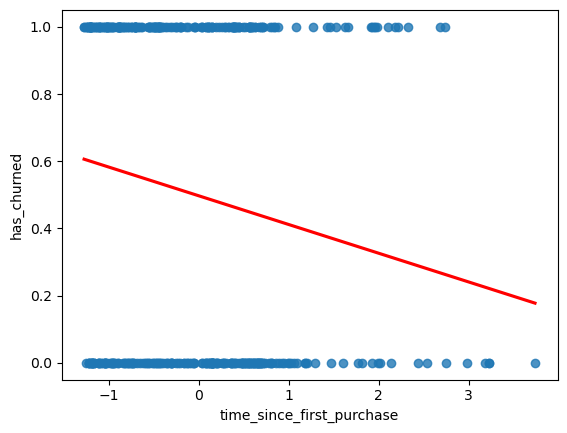

In [10]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data=churn,
    y='has_churned',
    x='time_since_first_purchase',
    ci=None,
    line_kws={"color": "red"}
)

plt.show()

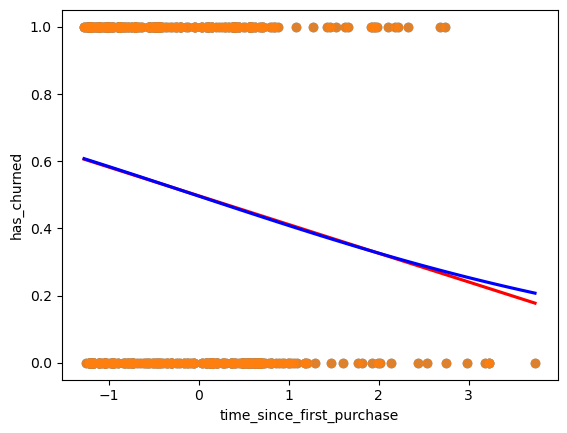

In [11]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data=churn,
    y='has_churned',
    x='time_since_first_purchase',
    ci=None,
    logistic=True,
    line_kws={"color": "blue"}
)
plt.show()

### Logistic regression with logit()

In [23]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit(
    "has_churned ~ time_since_first_purchase",
    data=churn
    ).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions and odds ratios

### Probabilities

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned=mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head(5))

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(
    data=churn,
    y='has_churned',
    x='time_since_first_purchase',
    ci=None,
    logistic=True,
)

# Overlay with prediction_data, colored red
sns.scatterplot(
    data=prediction_data,
    y='has_churned',
    x='time_since_first_purchase',
    color='blue'
)

plt.show()

### Most likely outcome

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head(5))

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(
    data=prediction_data,
    y='most_likely_outcome',
    x='time_since_first_purchase',
    color='red'
)

plt.show()

### Odds ratio

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head(5))

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(
    data=prediction_data,
    y='odds_ratio',
    x='time_since_first_purchase'
)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

### Log odds ratio

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head(5))

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit

### Calculating the confusion matrix

In [ ]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame(
    {
        "actual_response": actual_response,
        "predicted_response": predicted_response
    }
    )

# Print the outcomes
print(outcomes.value_counts(sort = False))

### Drawing a mosaic plot of the confusion matrix

In [ ]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

### Measuring logistic model performance

In [ ]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)